Copyright © 2025 Technical University of Denmark

In [1]:
from os import chdir
chdir('../')


In [2]:
from breeding import sim_breeding_circuit
from catprep import get_input_sq_cat
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from lcg_plus.effective_sqz import effective_sqz
from lcg_plus.conversions import Delta_to_dB, dB_to_r

from lcg_plus.plotting import plot_wigner_marginals
import seaborn as sns

hbar = 2
colwidth = 3.41667


# Plot Wigner function of the lossy SCS, and the output grid state

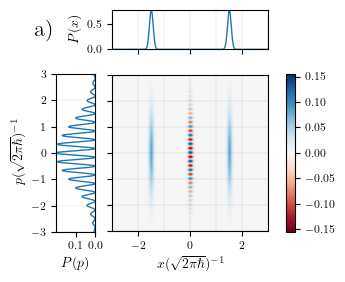

-12.000000000000002
11.999999999999995


In [6]:
grid = 'square'
eta = 1
num = 9
r_dB = -12
parity = 0
cat = get_input_sq_cat(num, r_dB, parity, grid, eta)
cat.get_norm()

fs = 10
x = np.linspace(-14,14,400)

mpl.rcParams.update({'font.size': fs, 
                     "text.usetex":  True, 
                     'font.family':'serif',
                     'xtick.labelsize': 8, 
                     'ytick.labelsize':8 })

W = cat.get_wigner_log(x,x)
kwargs = {'grid': 'square', 
          'fontsize' : fs, 
          'title': None, 
          'figsize' :(colwidth,colwidth), 
          'linewidth':1,
          'xlim': 3,
          'plim': 3}

fig_kwargs = {'dpi':800, 'bbox_inches': 'tight'}


fig, ax, axx, axp, cax = plot_wigner_marginals(W.real, x, x, **kwargs)
if eta == 1:
    axx.text(-0.5, 1.25, r'a)', fontsize = 16, transform=ax.transAxes)
else:
    axx.text(-0.5, 1.25, r'b)', fontsize = 16, transform=ax.transAxes)
plt.savefig(f'figures/W_in_N={num}_r={r_dB}_eta={eta}.pdf',**fig_kwargs)
plt.show()

print(Delta_to_dB(effective_sqz(cat, 'sp')))
print(Delta_to_dB(effective_sqz(cat, 'sx')))


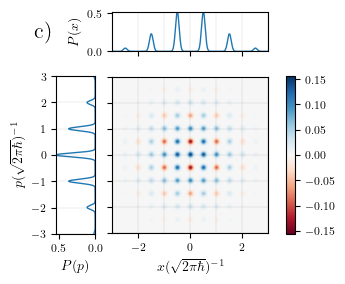

11.734419895397327
11.999999997567727
11.865180165820135


In [7]:
out, prob = sim_breeding_circuit(cat, num , np.ones(num-1)*np.pi/2, np.zeros(num-1))
out.normalise()
W = out.get_wigner_log(x,x)

fig, ax, axx, axp, cax = plot_wigner_marginals(W.real, x, x, **kwargs)
if eta == 1:
    axx.text(-0.5, 1.25, r'c)', fontsize = 16, transform=ax.transAxes)
else:
    axx.text(-0.5, 1.25, r'd)', fontsize = 16, transform=ax.transAxes)
#ax.plot(3,3, '*', color=cs[0], markersize= 10 ,linestyle=None)

plt.savefig(f'figures/W_out_N={num}_r={r_dB}_eta={eta}.pdf',**fig_kwargs)
plt.show()
Dp = effective_sqz(out, 'sp')
Dx = effective_sqz(out, 'sx')
Ds = np.sqrt((Dx**2+Dp**2)/2)

print(Delta_to_dB(Dp))
print(Delta_to_dB(Dx))
print(Delta_to_dB(Ds))

